In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

In [2]:
trainee_original = pd.read_csv("./train.csv")
trainee_original.head(10)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1


<AxesSubplot:>

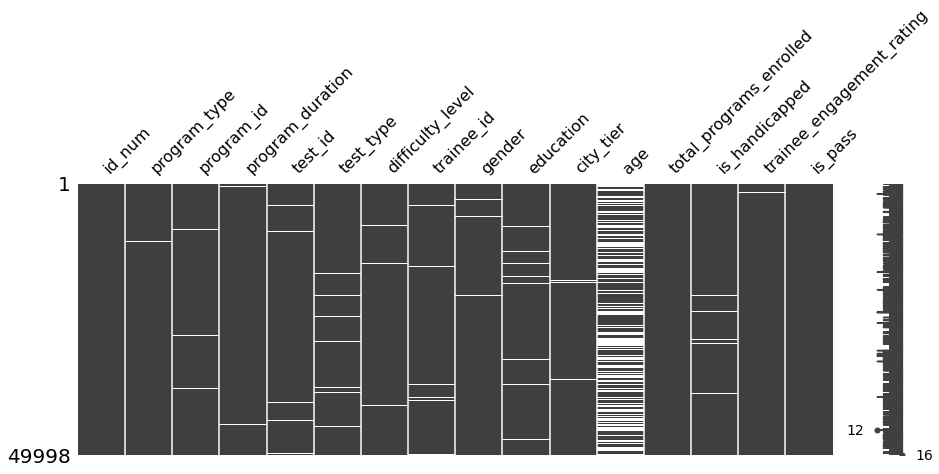

In [3]:
msno.matrix(trainee_original, figsize=(15, 5))

In [4]:
#将缺失值较少的数据直接删去
trainee = trainee_original.dropna(axis=0,subset = ["program_type","program_id","program_duration","test_id","test_type","difficulty_level","trainee_id","gender","education","city_tier","total_programs_enrolled","is_handicapped","trainee_engagement_rating"])

<AxesSubplot:>

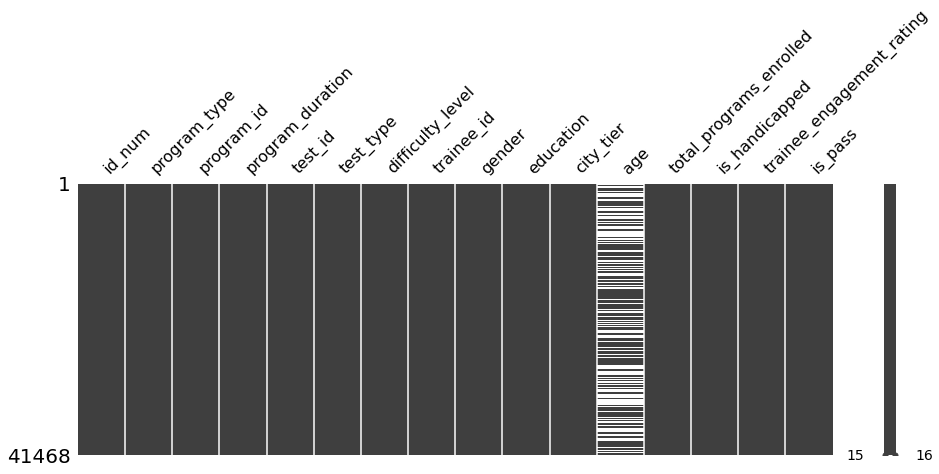

In [5]:
msno.matrix(trainee, figsize=(15, 5))

In [6]:
trainee.head(10)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1
10,9932_80,V,V_3,131.0,80.0,offline,easy,9932.0,F,High School Diploma,3.0,NaN,2.0,N,4.0,1


In [7]:
trainee.describe() # 按列统计特征
trainee.info()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,41468.000000,41468.000000,41468.000000,41468.000000,25427.000000,41468.000000,41468.000000,41468.000000
mean,128.212405,91.400719,9877.189278,2.249687,36.540449,2.585126,2.397535,0.696658
std,6.889023,51.231736,5720.148060,1.011196,9.037045,1.241136,1.324701,0.459707
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5065.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9683.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14637.750000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41468 entries, 0 to 49996
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     41468 non-null  object 
 1   program_type               41468 non-null  object 
 2   program_id                 41468 non-null  object 
 3   program_duration           41468 non-null  float64
 4   test_id                    41468 non-null  float64
 5   test_type                  41468 non-null  object 
 6   difficulty_level           41468 non-null  object 
 7   trainee_id                 41468 non-null  float64
 8   gender                     41468 non-null  object 
 9   education                  41468 non-null  object 
 10  city_tier                  41468 non-null  float64
 11  age                        25427 non-null  float64
 12  total_programs_enrolled    41468 non-null  float64
 13  is_handicapped             41468 non-null  obj

In [8]:
'''
Y = sum(trainee['age'] <= trainee['age'].mean())             #Y:younger than age's mean
O = sum(trainee['age'] > trainee['age'].mean())              #O:older than age's mean
YPass = 0                                                    #Y:younger than age's mean and pass
OPass = 0                                                    #Y:older than age's mean and pass
for(x,y) in zip(trainee['age'],trainee['is_pass']):
    if x<=trainee['age'].mean() and y==1:
        YPass+=1
    elif x>trainee['age'].mean() and y==1:
        OPass+=1
Y,O
YPass,OPass
YPass/Y,OPass/O
trainee['age'].mean()
'''

#通过计算发现年龄大于平均值的人数为13059，通过率为73%
#通过计算发现年龄小于平均值的通过率为12368，通过率为66%
#两者相差不大，因此可以用平均值填充缺失值

"\nY = sum(trainee['age'] <= trainee['age'].mean())             #Y:younger than age's mean\nO = sum(trainee['age'] > trainee['age'].mean())              #O:older than age's mean\nYPass = 0                                                    #Y:younger than age's mean and pass\nOPass = 0                                                    #Y:older than age's mean and pass\nfor(x,y) in zip(trainee['age'],trainee['is_pass']):\n    if x<=trainee['age'].mean() and y==1:\n        YPass+=1\n    elif x>trainee['age'].mean() and y==1:\n        OPass+=1\nY,O\nYPass,OPass\nYPass/Y,OPass/O\ntrainee['age'].mean()\n"

In [9]:
trainee['age'] = trainee['age'].fillna(trainee['age'].mean())
trainee['age'].isnull()

<ipython-input-9-92918e4772ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainee['age'] = trainee['age'].fillna(trainee['age'].mean())


0        False
1        False
2        False
3        False
4        False
         ...  
49991    False
49992    False
49993    False
49995    False
49996    False
Name: age, Length: 41468, dtype: bool

In [10]:
#program_type, program_id, program_duration 为一组数据，根据不同program_id通过率为其赋值
trainee.loc[trainee['program_id'] == 'Y_1', "program_id"] = 8        #通过率:0.78
trainee.loc[trainee['program_id'] == 'Y_2', "program_id"] = 7        #通过率:0.74
trainee.loc[trainee['program_id'] == 'Y_3', "program_id"] = 8        #通过率:0.75
trainee.loc[trainee['program_id'] == 'Y_4', "program_id"] = 8        #通过率:0.77

trainee.loc[trainee['program_id'] == 'T_1', "program_id"] = 5        #通过率:0.51
trainee.loc[trainee['program_id'] == 'T_2', "program_id"] = 7        #通过率:0.74
trainee.loc[trainee['program_id'] == 'T_3', "program_id"] = 7        #通过率:0.72
trainee.loc[trainee['program_id'] == 'T_4', "program_id"] = 7        #通过率:0.74

trainee.loc[trainee['program_id'] == 'U_1', "program_id"] = 6        #通过率:0.64
trainee.loc[trainee['program_id'] == 'U_2', "program_id"] = 6        #通过率:0.60

trainee.loc[trainee['program_id'] == 'V_1', "program_id"] = 6        #通过率:0.60
trainee.loc[trainee['program_id'] == 'V_2', "program_id"] = 6        #通过率:0.56
trainee.loc[trainee['program_id'] == 'V_3', "program_id"] = 6        #通过率:0.56
trainee.loc[trainee['program_id'] == 'V_4', "program_id"] = 6        #通过率:0.58

trainee.loc[trainee['program_id'] == 'Z_1', "program_id"] = 7        #通过率:0.71
trainee.loc[trainee['program_id'] == 'Z_2', "program_id"] = 7        #通过率:0.72
trainee.loc[trainee['program_id'] == 'Z_3', "program_id"] = 7        #通过率:0.73

trainee.loc[trainee['program_id'] == 'X_1', "program_id"] = 9        #通过率:0.85
trainee.loc[trainee['program_id'] == 'X_2', "program_id"] = 8        #通过率:0.77
trainee.loc[trainee['program_id'] == 'X_3', "program_id"] = 8        #通过率:0.81

trainee.loc[trainee['program_id'] == 'S_1', "program_id"] = 5        #通过率:0.52
trainee.loc[trainee['program_id'] == 'S_2', "program_id"] = 6        #通过率:0.59

C:\Users\13360\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [11]:
'''
offPass = 0
onPass = 0
for (x,y) in zip(trainee['test_type'],trainee['is_pass']):
    if x=='offline' and y==1:
        offPass+=1
    elif x=='online' and y==1:
        onPass+=1
offPass/sum(trainee['test_type'] == 'offline'),onPass/sum(trainee['test_type'] == 'online')
'''
#通过计算得到online and pass 的概率为0.78，offline and pass 的概率为0.63

"\noffPass = 0\nonPass = 0\nfor (x,y) in zip(trainee['test_type'],trainee['is_pass']):\n    if x=='offline' and y==1:\n        offPass+=1\n    elif x=='online' and y==1:\n        onPass+=1\noffPass/sum(trainee['test_type'] == 'offline'),onPass/sum(trainee['test_type'] == 'online')\n"

In [12]:
trainee.loc[trainee['test_type'] == 'offline', "test_type"] = 6
trainee.loc[trainee['test_type'] == 'online', "test_type"] = 8

In [13]:
'''
ePass = 0
iPass = 0
hPass = 0
vPass = 0
for (x,y) in zip(trainee['difficulty_level'],trainee['is_pass']):
    if x=='easy' and y==1:
        ePass+=1
    elif x=='intermediate' and y==1:
        iPass+=1
    elif x=='hard' and y==1:
        hPass+=1
    elif x=='vary hard' and y==1:
        vPass+=1
ePass/sum(trainee['difficulty_level'] == 'easy')            0.73
iPass/sum(trainee['difficulty_level'] == 'intermediate')    0.65
hPass/sum(trainee['difficulty_level'] == 'hard')            0.67
vPass/sum(trainee['difficulty_level'] == 'vary hard')      0.43
'''

"\nePass = 0\niPass = 0\nhPass = 0\nvPass = 0\nfor (x,y) in zip(trainee['difficulty_level'],trainee['is_pass']):\n    if x=='easy' and y==1:\n        ePass+=1\n    elif x=='intermediate' and y==1:\n        iPass+=1\n    elif x=='hard' and y==1:\n        hPass+=1\n    elif x=='vary hard' and y==1:\n        vPass+=1\nePass/sum(trainee['difficulty_level'] == 'easy')            0.73\niPass/sum(trainee['difficulty_level'] == 'intermediate')    0.65\nhPass/sum(trainee['difficulty_level'] == 'hard')            0.67\nvPass/sum(trainee['difficulty_level'] == 'vary hard')      0.43\n"

In [14]:
trainee.loc[trainee['difficulty_level'] == 'easy', "difficulty_level"] = 7
trainee.loc[trainee['difficulty_level'] == 'intermediate', "difficulty_level"] = 7
trainee.loc[trainee['difficulty_level'] == 'hard', "difficulty_level"] = 7
trainee.loc[trainee['difficulty_level'] == 'vary hard', "difficulty_level"] = 4

In [15]:
'''
HPass = 0
MatPass = 0
BPass = 0
MasPass = 0
NPass = 0
for (x,y) in zip(trainee['education'],trainee['is_pass']):
    if x=='High School Diploma' and y==1:
        HPass+=1
    elif x=='Matriculation' and y==1:
        MatPass+=1
    elif x=='Bachelors' and y==1:
        BPass+=1
    elif x=='Masters' and y==1:
        MasPass+=1
    elif x=='No Qualification' and y==1:
        NPass+=1
HPass/sum(trainee['education'] == 'High School Diploma')     0.71
MatPass/sum(trainee['education'] == 'Matriculation')         0.64
BPass/sum(trainee['education'] == 'Bachelors')               0.74
MasPass/sum(trainee['education'] == 'Masters')               0.86
NPass/sum(trainee['education'] == 'No Qualification')        0.58
'''

"\nHPass = 0\nMatPass = 0\nBPass = 0\nMasPass = 0\nNPass = 0\nfor (x,y) in zip(trainee['education'],trainee['is_pass']):\n    if x=='High School Diploma' and y==1:\n        HPass+=1\n    elif x=='Matriculation' and y==1:\n        MatPass+=1\n    elif x=='Bachelors' and y==1:\n        BPass+=1\n    elif x=='Masters' and y==1:\n        MasPass+=1\n    elif x=='No Qualification' and y==1:\n        NPass+=1\nHPass/sum(trainee['education'] == 'High School Diploma')     0.71\nMatPass/sum(trainee['education'] == 'Matriculation')         0.64\nBPass/sum(trainee['education'] == 'Bachelors')               0.74\nMasPass/sum(trainee['education'] == 'Masters')               0.86\nNPass/sum(trainee['education'] == 'No Qualification')        0.58\n"

In [16]:
trainee.loc[trainee['education'] == 'High School Diploma', "education"] = 7
trainee.loc[trainee['education'] == 'Matriculation', "education"] = 6
trainee.loc[trainee['education'] == 'Bachelors', "education"] = 7
trainee.loc[trainee['education'] == 'Masters', "education"] = 9
trainee.loc[trainee['education'] == 'No Qualification', "education"] = 6

In [17]:
trainee.loc[trainee['is_handicapped'] == 'Y', "is_handicapped"] = 0
trainee.loc[trainee['is_handicapped'] == 'N', "is_handicapped"] = 1

In [18]:
from sklearn.linear_model import LinearRegression # 导入线性回归的类，采用二分类进行分类预测
from sklearn.model_selection import KFold # K折交叉验证，取平均，调参

predictors = ["age","program_id","test_type","difficulty_level","education","is_handicapped","city_tier","total_programs_enrolled","trainee_engagement_rating"] # 输入机器学习算法的特征
LiR = LinearRegression() # 初始化线性回归类
kf = KFold() # KFold类实例化

predictions = []

LiR.fit(trainee[predictors], trainee["is_pass"]) # 训练模型
predictions.append(LiR.predict(trainee[predictors]))

predictions = np.concatenate(predictions, axis=0) # 转换成数组，才能比较大小

# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

print("测试数据的总数量：", len(predictions))
print("正确的数量：", sum(predictions == trainee["is_pass"]))
accuracy = sum(predictions == trainee["is_pass"]) / len(predictions)
print("准确率为：", accuracy)

LinearRegression()

测试数据的总数量： 41468
正确的数量： 29429
准确率为： 0.7096797530626024


In [19]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

LoR = LogisticRegression(random_state=1, solver='liblinear') # 初始化逻辑回归类

# 逻辑回归交叉验证
score = model_selection.cross_val_score(LoR, trainee[predictors], trainee["is_pass"], cv=3)
print("准确率为：", score.mean())

准确率为： 0.7118500363961332


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=1, n_estimators=50, max_depth=18)

predictions = []

gbc.fit(trainee[predictors], trainee["is_pass"])
predictions.append(gbc.predict(trainee[predictors]))

predictions = np.concatenate(predictions, axis=0) # 转换成数组，才能比较大小

# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

print("测试数据的总数量：", len(predictions))
print("正确的数量：", sum(predictions == trainee["is_pass"]))
accuracy = sum(predictions == trainee["is_pass"]) / len(predictions)
print("准确率为：", accuracy)

GradientBoostingClassifier(max_depth=18, n_estimators=50, random_state=1)

测试数据的总数量： 41468
正确的数量： 33579
准确率为： 0.8097569209993247


SelectKBest(k=5)

<ipython-input-21-3f694f786002>:9: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x2243ff48e20>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'program_id'),
  Text(2, 0, 'test_type'),
  Text(3, 0, 'difficulty_level'),
  Text(4, 0, 'education'),
  Text(5, 0, 'is_handicapped'),
  Text(6, 0, 'city_tier'),
  Text(7, 0, 'total_programs_enrolled'),
  Text(8, 0, 'trainee_engagement_rating')])

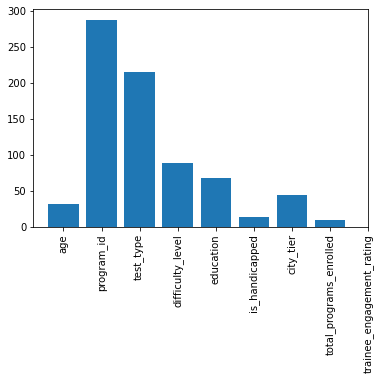

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif # 特征选择库
import matplotlib.pyplot as plt # 画出直方图，分析特征的权重

predictors = ["age","program_id","test_type","difficulty_level","education","is_handicapped","city_tier","total_programs_enrolled","trainee_engagement_rating"]

selector = SelectKBest(f_classif, k=5) # f_classif：基于方差分析的检验统计f值，根据k个最高分数选择功能
selector.fit(trainee[predictors], trainee["is_pass"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

predictors = ["program_id","test_type","difficulty_level","education","city_tier","trainee_engagement_rating"]

rfc = RandomForestClassifier()

scores = model_selection.cross_val_score(rfc, trainee[predictors], trainee["is_pass"], cv=kf)
print("随机森林模型的准确率：" + str(scores.mean()))

随机森林模型的准确率：0.7131039623627888
